In [675]:
from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/processed/mri")
print(os.getcwd())
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import torch
import albumentations as A
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1X35NgpoRZLTS0jivDsMTksGG26Hr7xU5/data/processed/mri


In [676]:
class Preprocessing:
  IMAGE_SIZE = (224, 224)

  @staticmethod
  def show_image(img):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img, cmap="grey")
    ax.axis("off")

  @staticmethod
  def denoise_img(img, **kwargs):
    if img.dtype != np.uint8:
          img_min, img_max = img.min(), img.max()
          if img_max <= 1.0:
              img = (img * 255).astype(np.uint8)
          else:
              img = img.astype(np.uint8)

    return cv2.fastNlMeansDenoising(img, h=10)

  @staticmethod
  def zscore_norm(img, **kwargs):
    return (img - img.mean()) / (img.std() + 1e-8)

  @staticmethod
  def apply_augmentation(img):
    augment = A.Compose([
      A.Resize(height=Preprocessing.IMAGE_SIZE[0], width=Preprocessing.IMAGE_SIZE[1], interpolation=cv2.INTER_LINEAR, mask_interpolation=cv2.INTER_NEAREST, area_for_downscale="image", p=1.0),

      A.Lambda(image=Preprocessing.denoise_img, p=1.0),

      A.Rotate(limit=10, border_mode=cv2.BORDER_REFLECT, p=0.5),

      A.HorizontalFlip(p=0.5),

      A.Lambda(image=Preprocessing.zscore_norm, p=1.0)
    ])

    return augment(image=img)["image"]

In [677]:
p = Path("train/glioma/19.png")

In [678]:
img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)

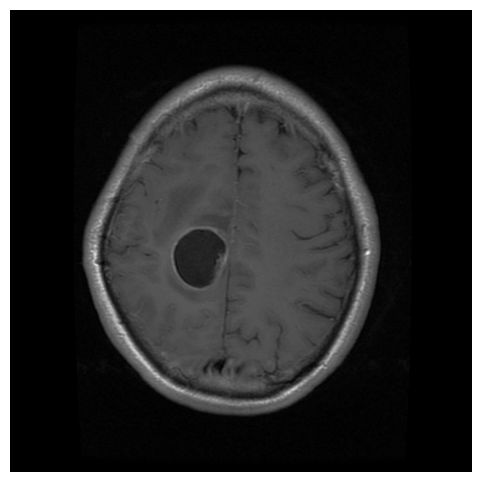

In [679]:
Preprocessing.show_image(img)

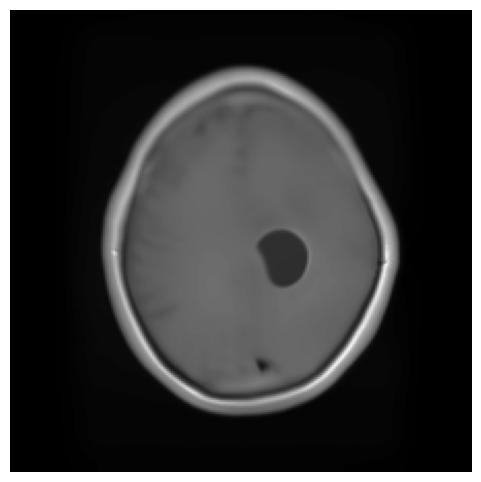

In [680]:
augmented_img = Preprocessing.apply_augmentation(img)
Preprocessing.show_image(augmented_img)